     Producto  Precio (USD)  Cantidad  Peso (kg)
0  Producto A         10.50         5        1.2
1  Producto B         20.75         3        2.5
2  Producto C         15.30         8        0.8


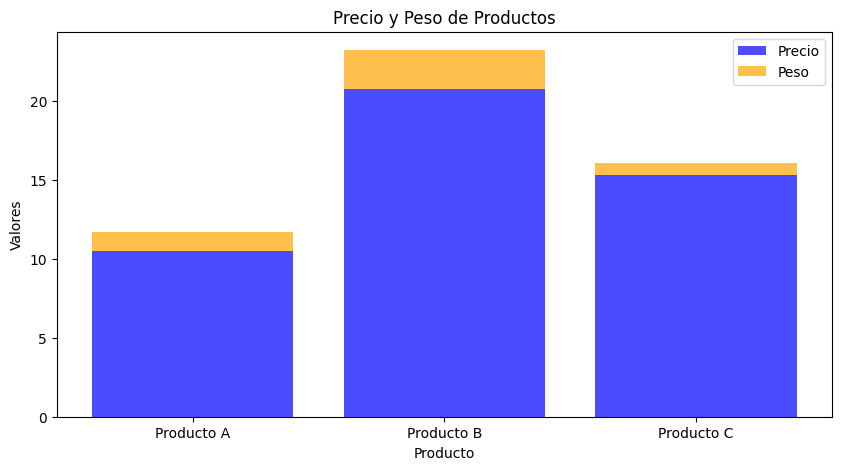

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame con datos cuantitativos continuos
data = {
    'Producto': ['Producto A', 'Producto B', 'Producto C'],
    'Precio (USD)': [10.50, 20.75, 15.30],
    'Cantidad': [5, 3, 8],
    'Peso (kg)': [1.2, 2.5, 0.8]
}

df = pd.DataFrame(data)

# Mostrar la tabla
print(df)

# Graficar los datos
plt.figure(figsize=(10, 5))
plt.bar(df['Producto'], df['Precio (USD)'], color='blue', alpha=0.7, label='Precio')
plt.bar(df['Producto'], df['Peso (kg)'], color='orange', alpha=0.7, label='Peso', bottom=df['Precio (USD)'])
plt.xlabel('Producto')
plt.ylabel('Valores')
plt.title('Precio y Peso de Productos')
plt.legend()
plt.show()

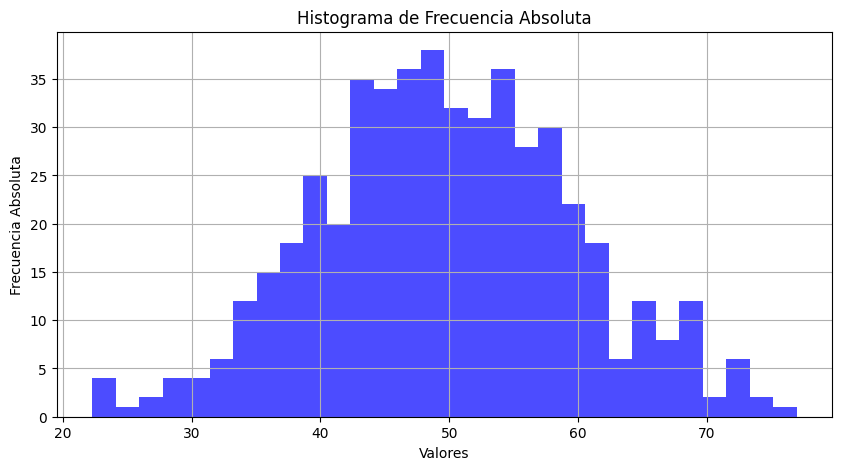

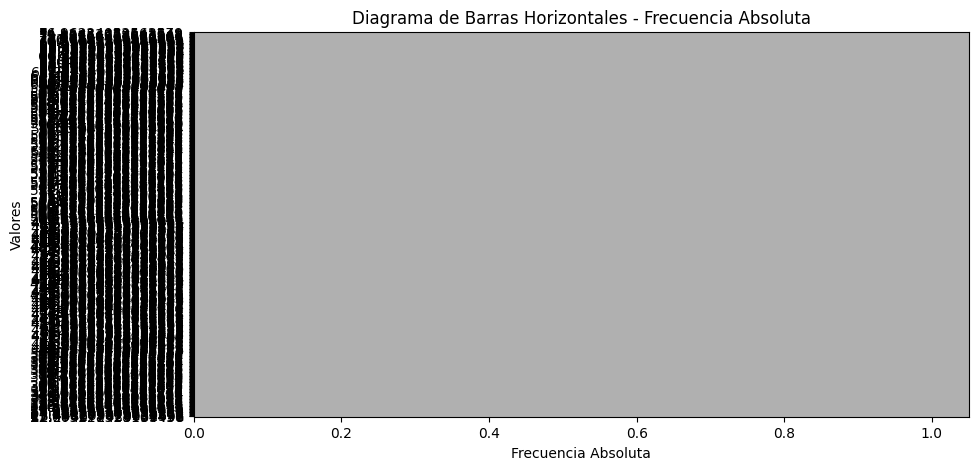

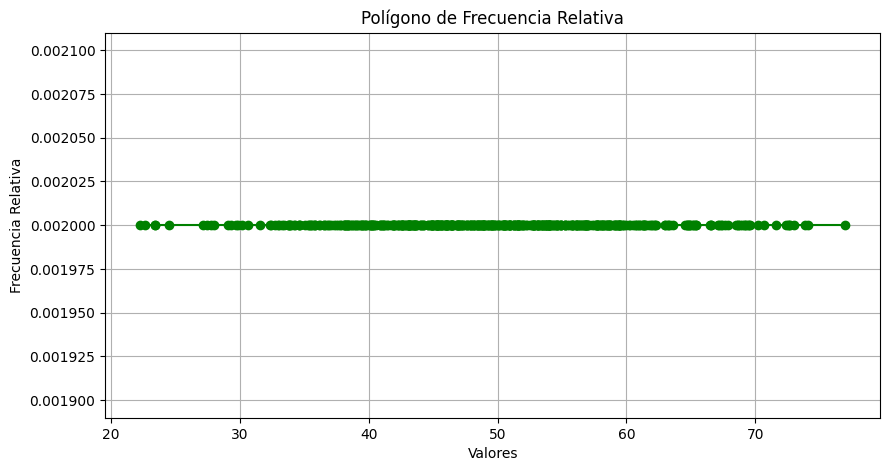

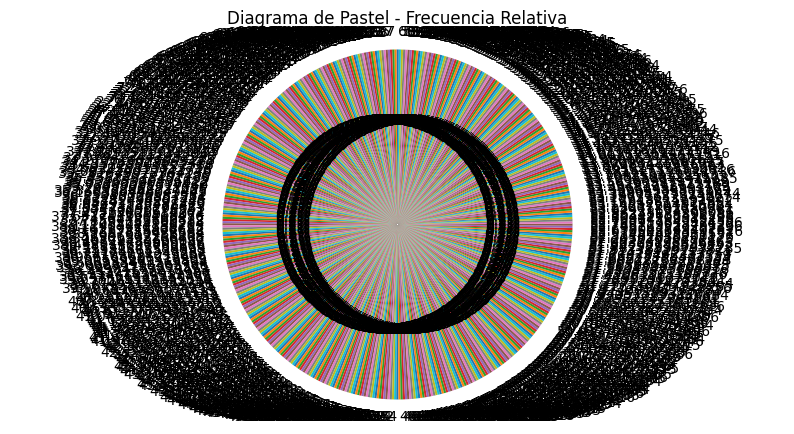

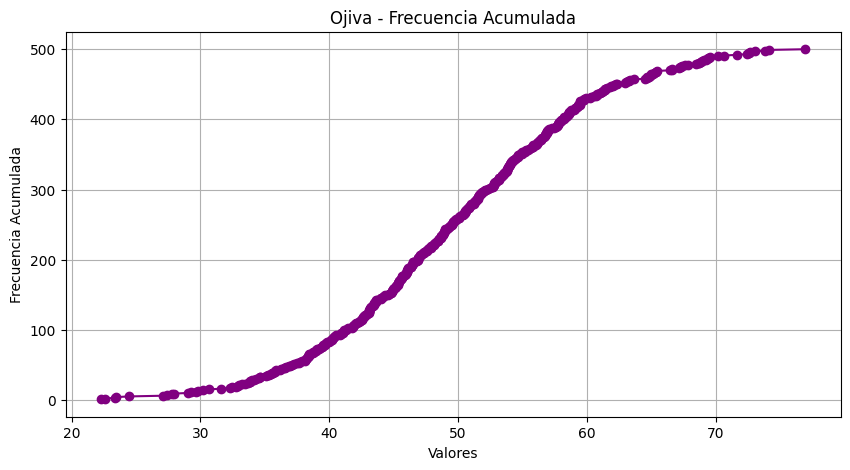

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generar 500 datos aleatorios
np.random.seed(0)  # Para reproducibilidad
data = np.random.normal(loc=50, scale=10, size=500)  # Datos aleatorios con distribución normal

# Crear un DataFrame
df = pd.DataFrame(data, columns=['Valores'])

# Calcular frecuencia absoluta
frecuencia_absoluta = df['Valores'].value_counts().sort_index()

# Calcular frecuencia relativa
frecuencia_relativa = frecuencia_absoluta / frecuencia_absoluta.sum()

# Calcular frecuencia acumulada
frecuencia_acumulada = frecuencia_absoluta.cumsum()

# Graficar la frecuencia absoluta usando un histograma
plt.figure(figsize=(10, 5))
plt.hist(df['Valores'], bins=30, color='blue', alpha=0.7)
plt.title('Histograma de Frecuencia Absoluta')
plt.xlabel('Valores')
plt.ylabel('Frecuencia Absoluta')
plt.grid()
plt.show()

# Graficar la frecuencia absoluta usando un diagrama de barras horizontales
plt.figure(figsize=(10, 5))
frecuencia_absoluta.plot(kind='barh', color='orange')
plt.title('Diagrama de Barras Horizontales - Frecuencia Absoluta')
plt.xlabel('Frecuencia Absoluta')
plt.ylabel('Valores')
plt.grid()
plt.show()

# Graficar la frecuencia relativa usando un polígono de frecuencia
plt.figure(figsize=(10, 5))
plt.plot(frecuencia_relativa.index, frecuencia_relativa.values, marker='o', color='green')
plt.title('Polígono de Frecuencia Relativa')
plt.xlabel('Valores')
plt.ylabel('Frecuencia Relativa')
plt.grid()
plt.show()

# Graficar la frecuencia relativa usando un diagrama de pastel
plt.figure(figsize=(10, 5))
plt.pie(frecuencia_relativa, labels=frecuencia_relativa.index, autopct='%1.1f%%', startangle=140)
plt.title('Diagrama de Pastel - Frecuencia Relativa')
plt.axis('equal')  # Para que el pastel sea circular
plt.show()

# Graficar la frecuencia acumulada usando la ojiva
plt.figure(figsize=(10, 5))
plt.plot(frecuencia_acumulada.index, frecuencia_acumulada.values, marker='o', color='purple')
plt.title('Ojiva - Frecuencia Acumulada')
plt.xlabel('Valores')
plt.ylabel('Frecuencia Acumulada')
plt.grid()
plt.show()